# **Install ImageAI and dependencies**

In [1]:
pip install tensorflow

In [11]:
pip install cython torch --extra-index-url https://download.pytorch.org/whl/cu102 torchvision>=0.10.0 --extra-index-url https://download.pytorch.org/whl/cu102 pytest tqdm mock


In [2]:
pip install keras numpy pillow scipy h5py matplotlib opencv-python keras-resnet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20456 sha256=457db5fbdb18ceee3542e29c5bcae8763ca13a8aca0ccfc41f2a4802762d6fab
  Stored in directory: /root/.cache/pip/wheels/16/af/88/a668b279c5eadbe55dcaf6207f09059135166cefb09088bacc
Successfully built keras-resnet


## **Install the ImageAI library**

In [3]:
pip install imageai --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 1.6 MB/s eta 0:00:00


Download the model file that will be used for object detection :

1. [RetinaNet Model - retinanet_resnet50_fpn_coco-eeacb38b.pth](https://github.com/OlafenwaMoses/ImageAI/releases/download/3.0.0-pretrained/retinanet_resnet50_fpn_coco-eeacb38b.pth/)

2. [YOLOv3 Model - yolov3.pt](https://github.com/OlafenwaMoses/ImageAI/releases/download/3.0.0-pretrained/yolov3.pt/)

3. [TinyYOLOv3 Model - tiny-yolov3.pt](https://github.com/OlafenwaMoses/ImageAI/releases/download/3.0.0-pretrained/tiny-yolov3.pt/)

## **Setting Up Google Drive as our Working Directory**

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
!ls "/content/drive/My Drive/ImageDetection_OpenCV/"

'=0.10.0'			 image3.jpg				    tiny-yolov3.pt
'Copy of Tutorial Codes.ipynb'	 resnet50_coco_best_v2.1.0.h5
 image2.jpg			 retinanet_resnet50_fpn_coco-eeacb38b.pth


In [15]:
import os

os.getcwd()
os.chdir('/content/drive/My Drive/ImageDetection_OpenCV')

execution_path = os.getcwd()
print(execution_path)

/content/drive/My Drive/ImageDetection_OpenCV


In [16]:
from imageai.Detection import ObjectDetection

We imported the ImageAI object detection class, imported the python os class  and defined a variable to hold the path to the folder where our python file, RetinaNet model file and images are located or stored.

In [17]:
detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath( os.path.join(execution_path , "yolov3.pt"))
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , "image3.jpg"), output_image_path=os.path.join(execution_path , "imagenew.jpg"), minimum_percentage_probability=30)


In the 5 lines of code above, we defined our object detection class in the first line, set the model type to RetinaNet in the second line, set the model path to the path of our RetinaNet model in the third line, load the model into the object detection class in the fourth line, then we called the detection function and parsed in the input image path and the output image path in the fifth line.

In [18]:
for eachObject in detections:
    print(eachObject["name"] , " : ", eachObject["percentage_probability"], " : ", eachObject["box_points"] )
    print("--------------------------------")

person  :  100.0  :  [407, 126, 686, 482]
--------------------------------
person  :  99.99  :  [215, 129, 422, 461]
--------------------------------
person  :  99.97  :  [274, 112, 316, 180]
--------------------------------
person  :  99.96  :  [686, 147, 743, 219]
--------------------------------
person  :  99.96  :  [234, 170, 286, 222]
--------------------------------
person  :  99.68  :  [79, 135, 197, 269]
--------------------------------
chair  :  99.52  :  [95, 270, 224, 347]
--------------------------------
chair  :  94.75  :  [159, 209, 271, 270]
--------------------------------
chair  :  99.93  :  [646, 237, 702, 382]
--------------------------------
laptop  :  99.53  :  [59, 337, 302, 475]
--------------------------------
laptop  :  99.26  :  [418, 372, 656, 514]
--------------------------------
laptop  :  79.46  :  [611, 496, 741, 572]
--------------------------------


In the above 2 lines of code, we iterate over all the results returned by the detector.detectObjectsFromImage function in the first line, then print out the name and percentage probability of the model on each object detected in the image in the second line.


ImageAI supports many powerful customization of the object detection process. One of it is the ability to extract the image of each object detected in the image. By simply parsing the extra parameter extract_detected_objects=True into the detectObjectsFromImage function as seen below, the object detection class will create a folder for the image objects, extract each image, save each to the new folder created and return an extra array that contains the path to each of the images.

Let us apply it to the first image and see some of the images from the result below:

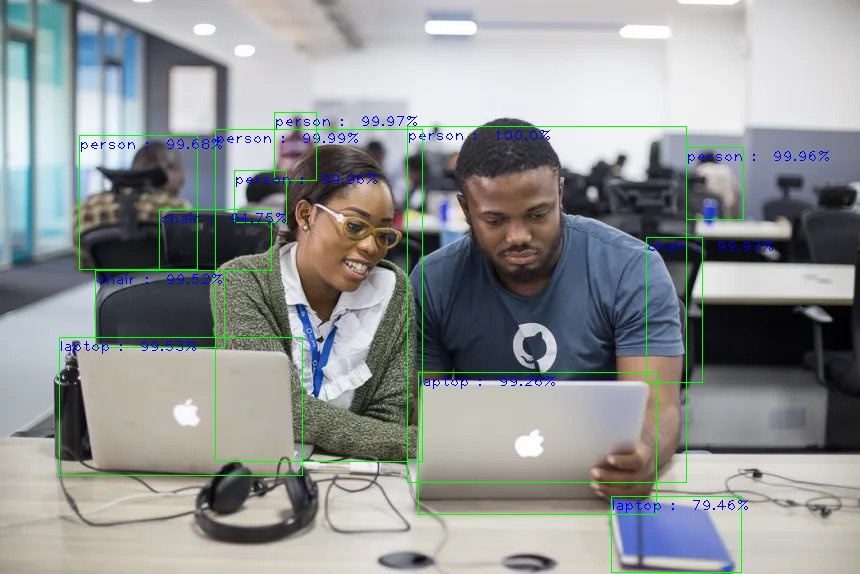

In [20]:
from IPython.display import Image

# Display a local image file
Image(filename='/content/drive/My Drive/ImageDetection_OpenCV/imagenew.jpg')

In the above 2 lines of code, we iterate over all the results returned by the detector.detectObjectsFromImage function in the first line, then print out the name and percentage probability of the model on each object detected in the image in the second line.


ImageAI supports many powerful customization of the object detection process. One of it is the ability to extract the image of each object detected in the image. By simply parsing the extra parameter extract_detected_objects=True into the detectObjectsFromImage function as seen below, the object detection class will create a folder for the image objects, extract each image, save each to the new folder created and return an extra array that contains the path to each of the images.

Let us apply it to the first image and see some of the images from the result below:

In [21]:
detections, extracted_images = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , 'image3.jpg'), output_image_path=os.path.join(execution_path , 'image3new.jpg'), extract_detected_objects=True)

In [22]:
detections

[{'name': 'person',
  'percentage_probability': 100.0,
  'box_points': [407, 126, 686, 482]},
 {'name': 'person',
  'percentage_probability': 99.99,
  'box_points': [215, 129, 422, 461]},
 {'name': 'person',
  'percentage_probability': 99.97,
  'box_points': [274, 112, 316, 180]},
 {'name': 'person',
  'percentage_probability': 99.96,
  'box_points': [686, 147, 743, 219]},
 {'name': 'person',
  'percentage_probability': 99.96,
  'box_points': [234, 170, 286, 222]},
 {'name': 'person',
  'percentage_probability': 99.68,
  'box_points': [79, 135, 197, 269]},
 {'name': 'chair',
  'percentage_probability': 99.52,
  'box_points': [95, 270, 224, 347]},
 {'name': 'chair',
  'percentage_probability': 94.75,
  'box_points': [159, 209, 271, 270]},
 {'name': 'chair',
  'percentage_probability': 99.93,
  'box_points': [646, 237, 702, 382]},
 {'name': 'laptop',
  'percentage_probability': 99.53,
  'box_points': [59, 337, 302, 475]},
 {'name': 'laptop',
  'percentage_probability': 99.26,
  'box_poin

In [23]:
extracted_images

['/content/drive/MyDrive/ImageDetection_OpenCV/image3new-extracted/image3new-1.jpg',
 '/content/drive/MyDrive/ImageDetection_OpenCV/image3new-extracted/image3new-2.jpg',
 '/content/drive/MyDrive/ImageDetection_OpenCV/image3new-extracted/image3new-3.jpg',
 '/content/drive/MyDrive/ImageDetection_OpenCV/image3new-extracted/image3new-4.jpg',
 '/content/drive/MyDrive/ImageDetection_OpenCV/image3new-extracted/image3new-5.jpg',
 '/content/drive/MyDrive/ImageDetection_OpenCV/image3new-extracted/image3new-6.jpg',
 '/content/drive/MyDrive/ImageDetection_OpenCV/image3new-extracted/image3new-7.jpg',
 '/content/drive/MyDrive/ImageDetection_OpenCV/image3new-extracted/image3new-8.jpg',
 '/content/drive/MyDrive/ImageDetection_OpenCV/image3new-extracted/image3new-9.jpg',
 '/content/drive/MyDrive/ImageDetection_OpenCV/image3new-extracted/image3new-10.jpg',
 '/content/drive/MyDrive/ImageDetection_OpenCV/image3new-extracted/image3new-11.jpg',
 '/content/drive/MyDrive/ImageDetection_OpenCV/image3new-extrac